In [112]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab11.ok')

Assignment: lab11
OK, version v1.13.11



# Lab 11: Logistic Regression
In this lab, you will get practice fitting a logistic regression model on NBA data.

### Due Date 
This assignment is due on **Monday, November 4 at 11:59pm**.

### Collaboration Policy
Data science is a collaborative activity. While you may talk with others about this assignment, we ask that you **write your solutions individually**. If you discuss the assignment with others, please **include their names** in the cell below.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set() 

In [114]:
df = pd.read_csv('nba.csv')
df["WON"] = df["WL"]
df["WON"] = df["WON"].replace("W", 1)
df["WON"] = df["WON"].replace("L", 0)
df.head(5)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,WON
0,22018,1610612744,GSW,Golden State Warriors,21800002,2018-10-16,GSW vs. OKC,W,240,42,...,58,28,7,7,21,29,108,8,1,1
1,22018,1610612760,OKC,Oklahoma City Thunder,21800002,2018-10-16,OKC @ GSW,L,240,33,...,45,21,12,6,15,21,100,-8,1,0
2,22018,1610612755,PHI,Philadelphia 76ers,21800001,2018-10-16,PHI @ BOS,L,240,34,...,47,18,8,5,16,20,87,-18,1,0
3,22018,1610612738,BOS,Boston Celtics,21800001,2018-10-16,BOS vs. PHI,W,240,42,...,55,21,7,5,15,20,105,18,1,1
4,22018,1610612750,MIN,Minnesota Timberwolves,21800010,2018-10-17,MIN @ SAS,L,240,39,...,46,20,9,2,11,27,108,-4,1,0


## Question 1: 1D Logistic Regression Model

In lecture we buit a logistic regression classifier for the NBA data loaded above. Specifically, our model took an observation $x$ and a parameter vector $\beta$ and used them to generate a prediction $\hat{y}$. Note that in this question we will assume that $x$ is a one-dimensional scalar.

In this case, our predictions represented the probability that the observation belonged to a specific category. In lecture the category was whether or not the team won. That is, $\hat{y} = P(Y = 1 | x)$, where $Y = 1$ indicates that the team we're observing won the game.

### Question 1a: Implementing a 1D Logistic Model

As discussed in lecture, the prediction of our model is $ \hat{y} = \sigma(x \hat{\beta})$. _Note: Here, both $x$ and $\hat{\beta}$ are scalars, not vectors._ 

In this lab we'll start by trying to build a model that predicts the winning probability as a function of the number of points that a team scored.

Below, first define `sigma` to be the sigmoid function we saw in lecture. Then, fill in `predicted_probability_of_winning_given_pts` so that it returns the correct prediction. Your function should work for both scalar and array arguments for `pts`. That is, `predicted_probability_of_winning_given_pts(100, 0.01)` should return a single value (0.731) and `predicted_probability_of_winning_given_pts(np.array([100, 110])), 0.01)` should return an array of values (0.731, 0.750). 

<!--
BEGIN QUESTION
name: q1a
-->

In [115]:
def sigma(t):
    return 1 / (1 + np.exp(-t))

def predicted_probability_of_winning_given_pts(pts, beta):
    return sigma(pts * beta)

In [116]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Exploring an Example Model

Suppose we pick $\hat{\beta}$ = 0.01. We can generate predictions for each of the games in our real world dataset as follows:

In [117]:
beta = 0.01
x = df["PTS"]
y_obs = df["WON"]
y_hat = predicted_probability_of_winning_given_pts(x, beta)

If we look at our predictions, we see that every team is given a greater than 50 percent prediction of winning based on their number of points. This suggests a problem with our model.

In [118]:
y_hat.mean()

0.7517679619807067

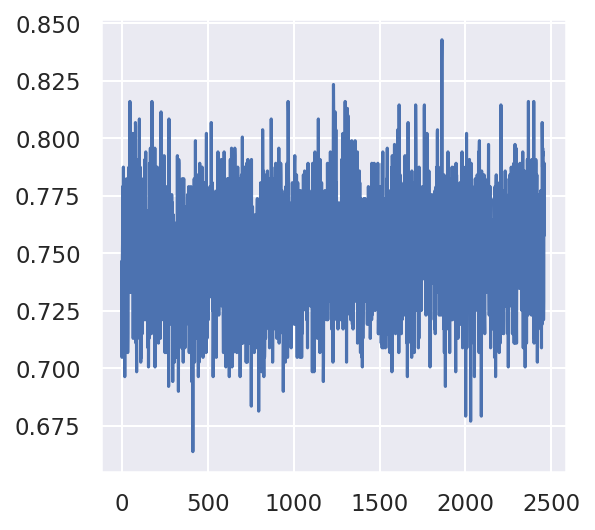

In [119]:
plt.plot(y_hat);

To understand what's going on, we make a plot of the prediction our model will make as a function of the number of points scored for $\hat{\beta} = 0.01$. 

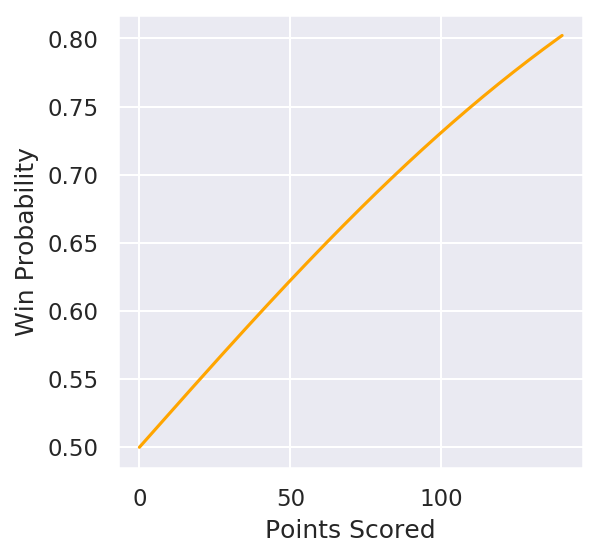

In [120]:
beta = 0.01
pts = np.linspace(0, 140, 140)
plt.plot(pts, predicted_probability_of_winning_given_pts(pts, beta), color = 'orange')
plt.ylabel("Win Probability")
plt.xlabel("Points Scored");

We can also provide the actual results from the NBA dataset as blue stars for comparison to our model.

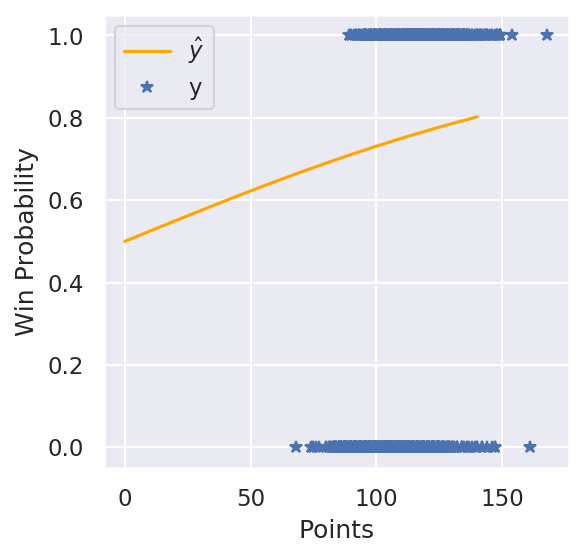

In [121]:
beta = 0.01
pts = np.linspace(0, 140, 140)
plt.plot(pts, predicted_probability_of_winning_given_pts(pts, beta), color = 'orange')
plt.plot(df[["PTS"]], df[["WON"]], 'b*')
plt.ylabel("Win Probability")
plt.xlabel("Points")
plt.legend(['$\hat{y}$', 'y']);

### Question 1b

<!--
BEGIN QUESTION
name: q1b
-->

Is this model reasonable? Why or why not?

Not reasonable, it doesn't tell us much information. the chance of winning is always at least .5, which doesn't make much sense since our dataframe gives two rows for one game. 

### Question 1c

Try playing around with other beta values. You should observe that the models are all pretty bad, no matter what $\beta$ you pick. Explain why below.

<!--
BEGIN QUESTION
name: q1c
-->

we don't have an intercept and bias term in our regression model

## Question 2: Adding an Intercept Term

If you observe your plot(s) from the previous part of this lab, you'll see that the chance of winning is always at least 0.5 under our model. This is unreasonable, e.g. suppose a team somehow scored only 36 points, they'd have no chance of winning in an NBA game.

### Implementing Multiple Linear Regression

To deal with this, we should add another feature to our model. Specifically, we'll add a bias term, i.e. a feature that is equal to 1 for all observations. We've done this for you below.

In [122]:
points_and_bias = df[["PTS"]].copy()
points_and_bias["bias"] = np.ones(len(points_and_bias))
points_and_bias.head()

,PTS,bias
0,108,1.0
1,100,1.0
2,87,1.0
3,105,1.0
4,108,1.0


Logistic regression generalizes to multiple features in exactly the same manner as linear regression.

Recall that whereas linear regression on one parameter gave predictions $\hat{y} = x \hat{\beta}$, multiple linear regression gave predictions $\hat{y} = \vec{x} \cdot \vec{\hat{\beta}} = \vec{x}^T \vec{\hat{\beta}} = \sum_{i = 1}^p x_i \hat{\beta}_i$.

Logistic regression generalizes in exactly the same way. That is logistic regression in 1 variable is given by $\hat{y} = \sigma(x \hat{\beta})$, whereas multiple logistic regression is given by $\hat{y} = \sigma(\vec{x} \cdot \vec{\hat{\beta}}) = \sigma(\vec{x}^T \vec{\hat{\beta}}) = \sigma(\sum_{i = 1}^p x_i \hat{\beta}_i)$.

Fill in the function below so that it returns predictions as described above. As in question 1, your model should be able to handle scalar and array arguments for x. For example `predicted_probability_of_winning_given_features(X.iloc[0:3, :], [0.1, -10])` should return a list (or series) (or numpy array) of the values `[0.6899744811276126, 0.5, 0.21416501695744153]`.

Your function only needs to work for array inputs to `x`. That is, your code does not need to work properly for `predicted_probability_of_winning_given_features(110, [0.1, -10])`

<!--
BEGIN QUESTION
name: q2a
-->

In [123]:
def predicted_probability_of_winning_given_features(X, beta):
    return sigma(X.dot(beta))

In [124]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Exploring Multiple Logistic Regression

Now we have two parameters $\beta_1$ and $\beta_2$. Suppose $\beta_1 = 0.001$ and $\beta_2 = 2$. We can compute the predicted probability that each team won during each game as follows.

In [125]:
beta = np.array([0.001, 2])
predicted_probability_of_winning_given_features(points_and_bias.iloc[0:3, :], beta)

0    0.891678
1    0.890903
2    0.889633
dtype: float64

In [126]:
points_and_bias.iloc[0:3, :]

,PTS,bias
0,108,1.0
1,100,1.0
2,87,1.0


Now that we have a bias term, we have more freedom to adjust our model.

For example, if $\beta_1 = 0.05$ and $\beta_2 = -5$, we get the curve below. Here, the prediction of your model is $\sigma(\beta_1 \times PTS + \beta_2)$. That is, $\beta_1$ is the weight of `PTS`, and $\beta_2$ is the weight of the bias term.

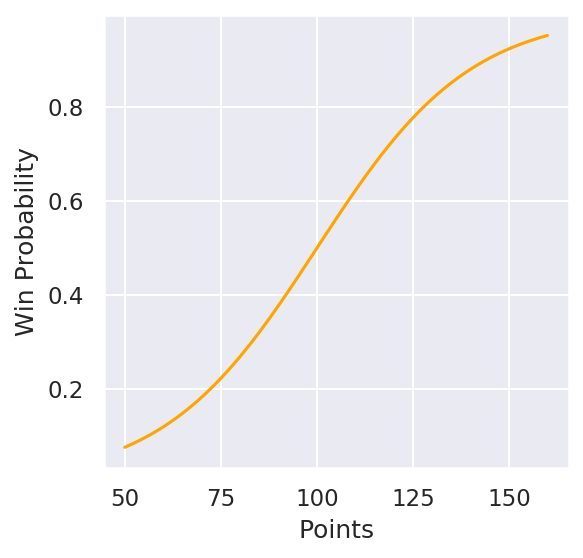

In [127]:
beta = [0.05, -5]
pts = np.linspace(50, 160, 111).reshape(-1, 1)
bias = np.ones(len(pts)).reshape(-1, 1)
point_range_and_bias = np.hstack((pts, bias))
plt.plot(pts, predicted_probability_of_winning_given_features(point_range_and_bias, beta), 'orange')
plt.ylabel("Win Probability")
plt.xlabel("Points");

And as before, we can also plot the actual data from our NBA dataset for comparison with our model.

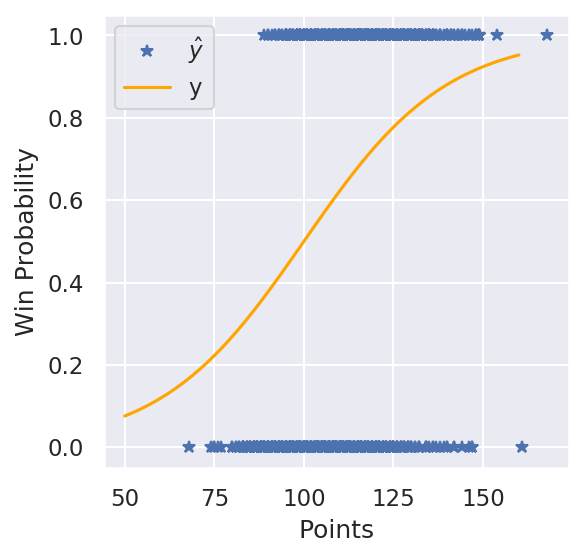

In [128]:
plt.plot(df["PTS"], df["WON"], 'b*')
beta = [0.05, -5]
pts = np.linspace(50, 160, 111).reshape(-1, 1)
bias = np.ones(len(pts)).reshape(-1, 1)
point_range_and_bias = np.hstack((pts, bias))
plt.plot(pts, predicted_probability_of_winning_given_features(point_range_and_bias, beta), 'orange')
plt.ylabel("Win Probability")
plt.xlabel("Points")
plt.legend(['$\hat{y}$', 'y']);

### Question 2b

<!--
BEGIN QUESTION
name: q2b
-->
Using the plot above, try adjusting $\beta_2$ (only). Describe how changing $\beta_2$ affects the prediction curve. Provide your description in the cell below.

as $\beta_2$ decreases, the prediction curve becomes not centered and the win probability is lower. the curve also becomes more convex. as $\beta_2$ increases, the prediction curve shifts vertically upward (higher win probability) and becomes more concave.  

### Question 2c
Now using the plot below try adjusting $\beta_1$ and $\beta_2$ such that you get a sharp curve that is centered at 100 points. In the cell below `beta` should be a list with your chosen values of $\beta_1$ and $\beta_2$.

- By "centered at 100 points", we mean that $\hat{y}$ should be equal to 0.5 when $x = 100$.
- By "sharp", we mean that the probability should be less than 5% percent for $x = 80$, and greater than 95% for $x = 100$.
- *Hint*: $\sigma(t) = 0.5$ when $t = 0$.

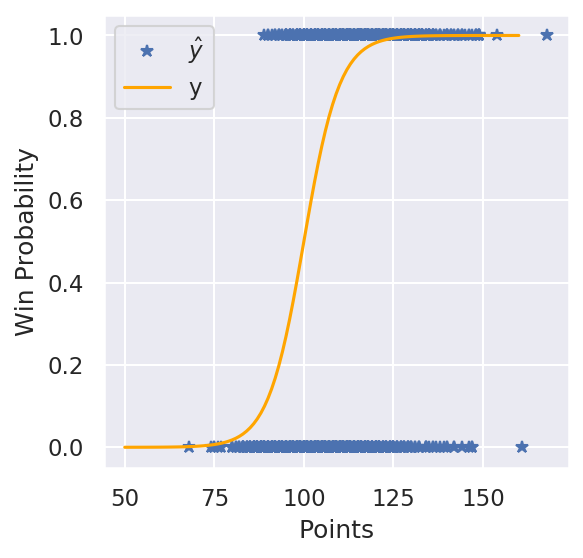

In [129]:
plt.plot(df["PTS"], df["WON"], 'b*')
beta = [.2, -20]
pts = np.linspace(50, 160, 111).reshape(-1, 1)
bias = np.ones(len(pts)).reshape(-1, 1)
point_range_and_bias = np.hstack((pts, bias))
plt.plot(pts, predicted_probability_of_winning_given_features(point_range_and_bias, beta), 'orange')
plt.ylabel("Win Probability")
plt.xlabel("Points")
plt.legend(['$\hat{y}$', 'y']);

Provide your $\beta_1$ and $\beta_2$ in the cell below.
<!--
BEGIN QUESTION
name: q2c
-->

In [130]:
beta1 = .2
beta2 = -20

In [131]:
ok.grade("q2c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Question 3 : Optimizing Multiple Logistic Regresion

Let's now work towards finding the optimal beta $\vec{\hat{\beta}}$ for our given data.

_Note: In the previous question, we referred to our $\beta$s without a hat, since we had yet to find the optimal values of $\vec{\beta}$ procedurally._

### Question 3a: Calculating MSE

Create a function `mse_for_model_on_NBA_data(beta)` that takes in a value of $\vec{{\beta}}$ and returns the MSE on the dataset from above. You will first need to define the function `mse(y_obs, y_hat)` which finds the mean squared error between `y_obs` and `y_hat`.

**Hint:** You need to compute $\hat{y}$ using the given $\vec{\beta}$, then the mean squared error between $\hat{y}$ and the observed data $y$.

**Hint:** Use `points_and_bias` and `df["WON"]`.

<!--
BEGIN QUESTION
name: q3a
-->

In [132]:
def mse(y_obs, y_hat):
    return np.mean((y_obs - y_hat)**2)

def mse_for_model_on_NBA_data(beta):
    x = points_and_bias['PTS']
    y_obs = df['WON']
    y_hat = sigma((beta[0]*x)+beta[1])
    return mse(y_obs, y_hat)

In [133]:
ok.grade("q3a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Plotting MSE

The cell below plots your MSE function. We're providing this plot purely for your edification. Warning: This code can be pretty slow and might take a minute or two to run.

Note that the surface has a huge almost completely flat region. This means this loss function is very difficult to optimize.

In [134]:
import plotly.graph_objects as go

num_points = 50 # increase for better resolution, but it will run more slowly. 

if (num_points <= 100):

    uvalues = np.linspace(-0.3, 0.3, num_points)
    vvalues = np.linspace(-20, 20, num_points)
    (u,v) = np.meshgrid(uvalues, vvalues)
    thetas = np.vstack((u.flatten(),v.flatten()))

    MSE = np.array([mse_for_model_on_NBA_data(t) for t in thetas.T])

    loss_surface = go.Surface(x=u, y=v, z=np.reshape(MSE, u.shape))

    fig = go.Figure(data=[loss_surface])
    fig.update_layout(scene = dict(
        xaxis_title = "theta0",
        yaxis_title = "theta1",
        zaxis_title = "MSE"))
    fig.show()
else:
    print("Picking num points > 100 can be really slow. If you really want to try, edit the code above so that this if statement doesn't trigger.")

### Question 3b: Minimizing MSE

Using `scipy.optimize.minimize`, find the optimal $\vec{\hat{\beta}}$.  Give your answer as `beta_hat_1` and `beta_hat_2`. The resulting MSE should be less than 0.2.

Note: Your starting guess should be (0, 0). If you start somewhere over in the flat region like (0, 20), then scipy.optimize.minimize will get stuck.

Note: The test for this question requires that you did Question 3a correctly.

<!--
BEGIN QUESTION
name: q3b
-->

In [135]:
from scipy.optimize import minimize

optimal_beta = minimize(mse_for_model_on_NBA_data, x0=[0,0])
beta_hat_1 = optimal_beta.x[0]
beta_hat_2 = optimal_beta.x[1]

In [136]:
ok.grade("q3b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3c

Finally, let's try to understand how our model can be practically useful. As we'll see in lecture on 11/5, we often convert our logistic regression models into a concrete prediction by thresholding. That is, if our $\hat{y} \geq 0.5$, we say our prediction is that the team will win; otherwise, we say that we predict that we will lose. A simple way to do this is just to round our $\hat{y}$.

In [137]:
y_hat = predicted_probability_of_winning_given_features(points_and_bias, np.array([beta_hat_1, beta_hat_2])) 
games_and_predictions = df.copy()
games_and_predictions["predicted_to_win"] = np.round(y_hat)
games_and_predictions[["TEAM_NAME", "GAME_DATE", "WON", "predicted_to_win"]].tail(5)

,TEAM_NAME,GAME_DATE,WON,predicted_to_win
2455,Denver Nuggets,2019-04-10,1,0.0
2456,Orlando Magic,2019-04-10,1,1.0
2457,Charlotte Hornets,2019-04-10,0,1.0
2458,Memphis Grizzlies,2019-04-10,1,1.0
2459,Golden State Warriors,2019-04-10,0,1.0


To evaluate the quality of your model, compute the fraction of the rows of the table for which your model was able to correctly predict the outcome of the game based on only the points scored by one team. Assign this to the variable `percentage_correct`.

<!--
BEGIN QUESTION
name: q3c
-->

In [163]:
percentage_correct = games_and_predictions[games_and_predictions['WON']==games_and_predictions['predicted_to_win']]['WON'].count() / len(games_and_predictions)


In [164]:
ok.grade("q3c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [165]:
games_and_predictions[games_and_predictions['WON']==games_and_predictions['predicted_to_win']]['WON'].count() / len(games_and_predictions)



0.7109756097560975

### Question 3d

Recall that the surface for the MSE has a huge almost completely flat region, which means that the loss function is very difficult to optimize.

In lecture on Tuesday 11/5, we'll talk about an alternate loss function called the cross-entropy loss that will yield a much nicer loss surface (no big flat regions). We have defined `cel(y_obs, y_hat)` for you; this function calculates the cross-entropy loss betweeen `y_obs` and `y_hat`. Create a function `cel_for_model_on_NBA_data(beta)` that takes in a value of $\vec{{\beta}}$ and returns the cross-entropy loss on the dataset from question 2.

**Hint:** Your code for this part should be very similar to your code for question 3a.

<!--
BEGIN QUESTION
name: q3d
-->

In [166]:
def cel(y_obs, y_hat):
    return -np.mean(y_obs * np.log(y_hat) + (1 - y_obs) * np.log(1 - y_hat))

def cel_for_model_on_NBA_data(beta):
    x = points_and_bias['PTS']
    y_obs = df['WON']
    y_hat = sigma((beta[0]*x)+beta[1])
    return cel(y_obs, y_hat)

In [167]:
ok.grade("q3d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Plotting Cross-Entropy Loss

The cell below plots your cross-entropy loss function. Note that the surface has no big flat regions, which makes it easy to optimize.

Note: Feel free to ignore the divide by zero warning.

In [168]:
import plotly.graph_objects as go

num_points = 50 # increase for better resolution, but it will run more slowly. 

if (num_points <= 100):

    uvalues = np.linspace(-0.3, 0.3, num_points)
    vvalues = np.linspace(-20, 20, num_points)
    (u,v) = np.meshgrid(uvalues, vvalues)
    thetas = np.vstack((u.flatten(),v.flatten()))

    CEL = np.array([cel_for_model_on_NBA_data(t) for t in thetas.T])

    loss_surface = go.Surface(x=u, y=v, z=np.reshape(CEL, u.shape))

    fig = go.Figure(data=[loss_surface])
    fig.update_layout(scene = dict(
        xaxis_title = "theta0",
        yaxis_title = "theta1",
        zaxis_title = "CEL"))
    fig.show()
else:
    print("Picking num points > 100 can be really slow. If you really want to try, edit the code above so that this if statement doesn't trigger.")

/srv/conda/envs/data100/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning:

divide by zero encountered in log



In this lab we only fit a logistic regression model one one feature (the number of points) and an intercept term. However, we can easily train a higher dimensional logistic regression model by using more features that provide useful information. For example, we can add the column `FGM` to our model in addition to `PTS`. Note that this is similar to the difference between simple linear regression and multiple linear regression. As an optional exercise, consider adding more features to your logistic regression model to increase `percentage_correct` from question 3c.

# Make sure to complete Vitamin 11 on Gradescope by 11:59 PM on Monday, 11/4!

## Submission

Congratulations! You are finished with this assignment. Please don't forget to submit by 11:59pm on Monday, 11/4!

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [169]:
# Save your notebook first, then run this cell to submit.
ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab11.ipynb'.


ERROR  | auth.py:91 | {'error': 'invalid_grant'}


Performing authentication
Please enter your bCourses email.
bCourses email: jodiechin@berkeley.edu

Copy the following URL and open it in a web browser. To copy,
highlight the URL, right-click, and select "Copy".

https://okpy.org/client/login/

After logging in, copy the code from the web page, paste it below,
and press Enter. To paste, right-click and select "Paste".

Paste your code here: wjPdoSv8nBpRxyQNnbkQuSXiemlCZC
Successfully logged in as jodiechin@berkeley.edu
Submit... 100% complete
Submission successful for user: jodiechin@berkeley.edu
URL: https://okpy.org/cal/data100/fa19/lab11/submissions/08D8jL

